In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def visualize_column_distributions(df, custom_order=None, height_override=None, num_cols_override=None):
    num_plots = len(df.columns)
    num_cols = 2
    if num_cols_override is not None:
        num_cols = num_cols_override
    num_rows = (num_plots + num_cols - 1) // num_cols

    height = 10 * num_rows
    if height_override is not None:
        height = height_override
    plt.figure(figsize=(15, height))

    for i, column in enumerate(df.columns):
        plt.subplot(num_rows, num_cols, i + 1)

        if df[column].dtype == 'object':
            if custom_order and column in custom_order:
                sns.countplot(data=df, x=column, order=custom_order[column], palette="Set3")
            else:
                sns.countplot(data=df, x=column, palette="Set3")
            plt.title(f'{column}')
            plt.xticks(rotation=45)
        else:
            sns.histplot(data=df, x=column, kde=True)
            plt.title(f'Distribution of {column}')

    plt.tight_layout()
    plt.show()


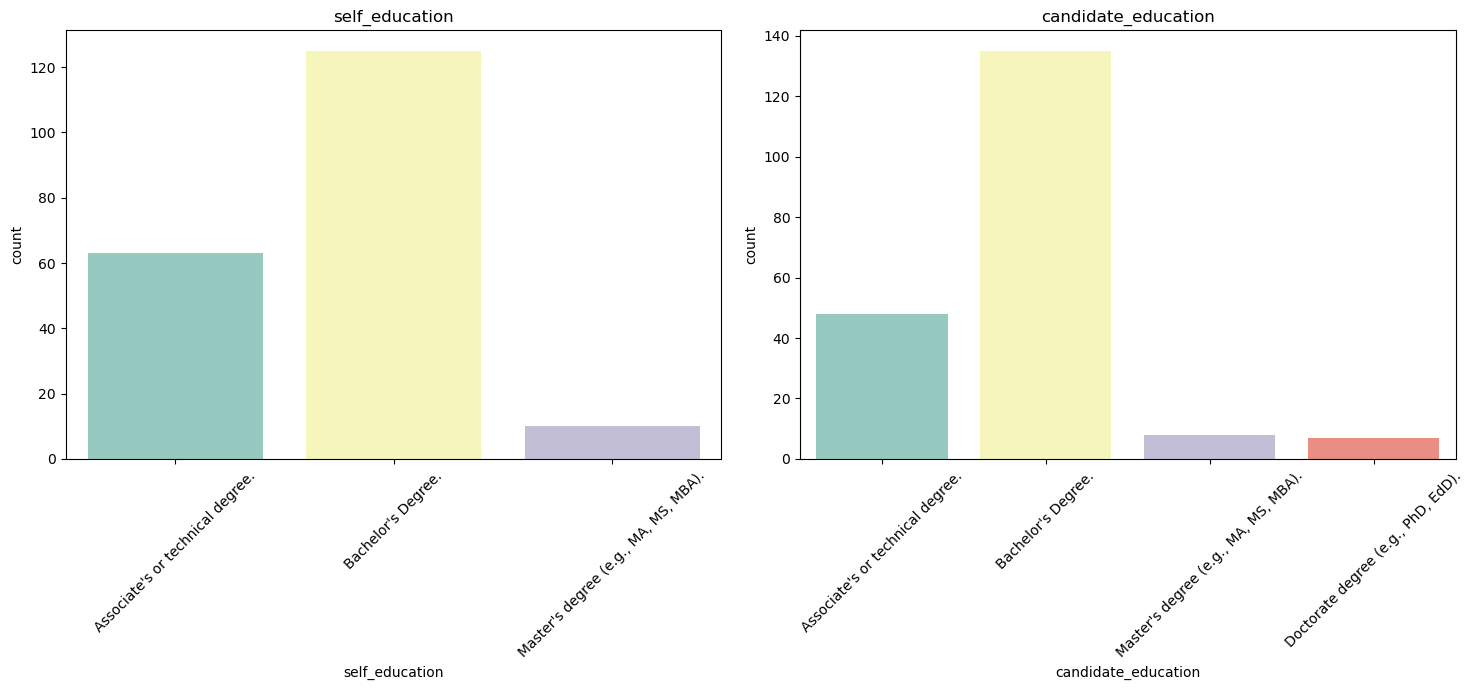

In [3]:
df = pd.read_csv('full_data_2024-04-24 04_57_21.547443.csv')
df = df[['self_education', 'candidate_education']]
visualize_column_distributions(df, {'self_education':["Associate's or technical degree.",
                                    "Bachelor's Degree.",
                                    "Master's degree (e.g., MA, MS, MBA)."],
                                   'candidate_education':["Associate's or technical degree.",
                                    "Bachelor's Degree.",
                                    "Master's degree (e.g., MA, MS, MBA).",
                                    "Doctorate degree (e.g., PhD, EdD)."]}, 7)


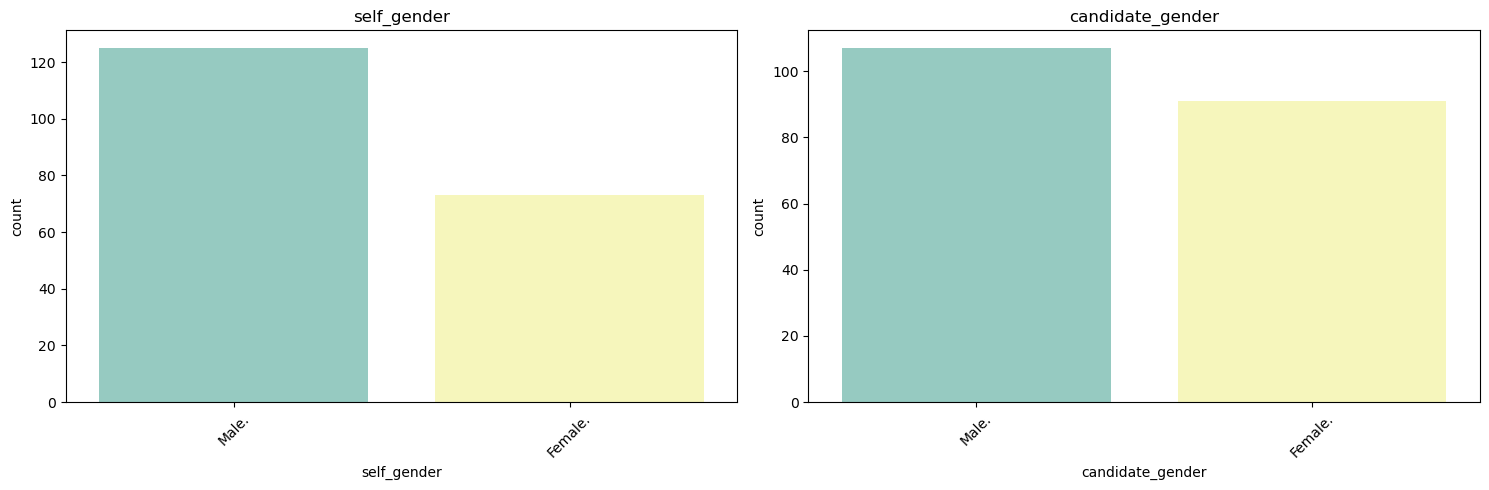

In [4]:
df = pd.read_csv('full_data_2024-04-24 04_57_21.547443.csv')
df = df[['self_gender', 'candidate_gender']]
visualize_column_distributions(df, {'self_gender':['Male.', 'Female.'],
                                   'candidate_gender':['Male.', 'Female.']}, 5)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', 

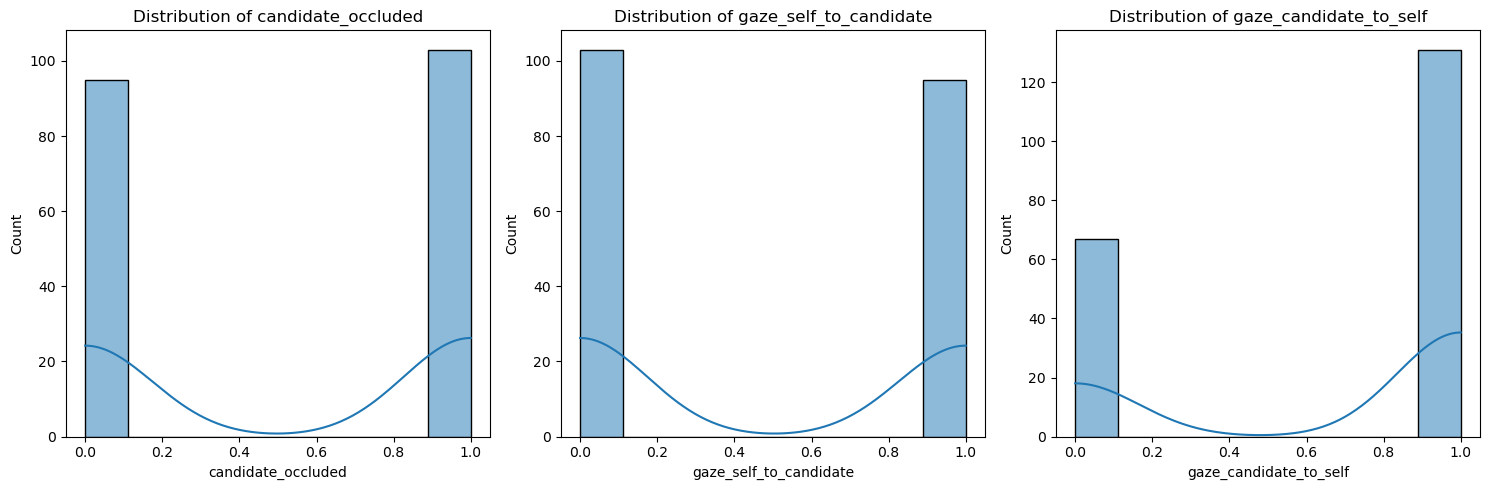

In [5]:
df = pd.read_csv('full_data_2024-04-24 04_57_21.547443.csv')
df = df[['candidate_occluded', 'gaze_self_to_candidate', 'gaze_candidate_to_self']]
visualize_column_distributions(df, None, 5, 3)


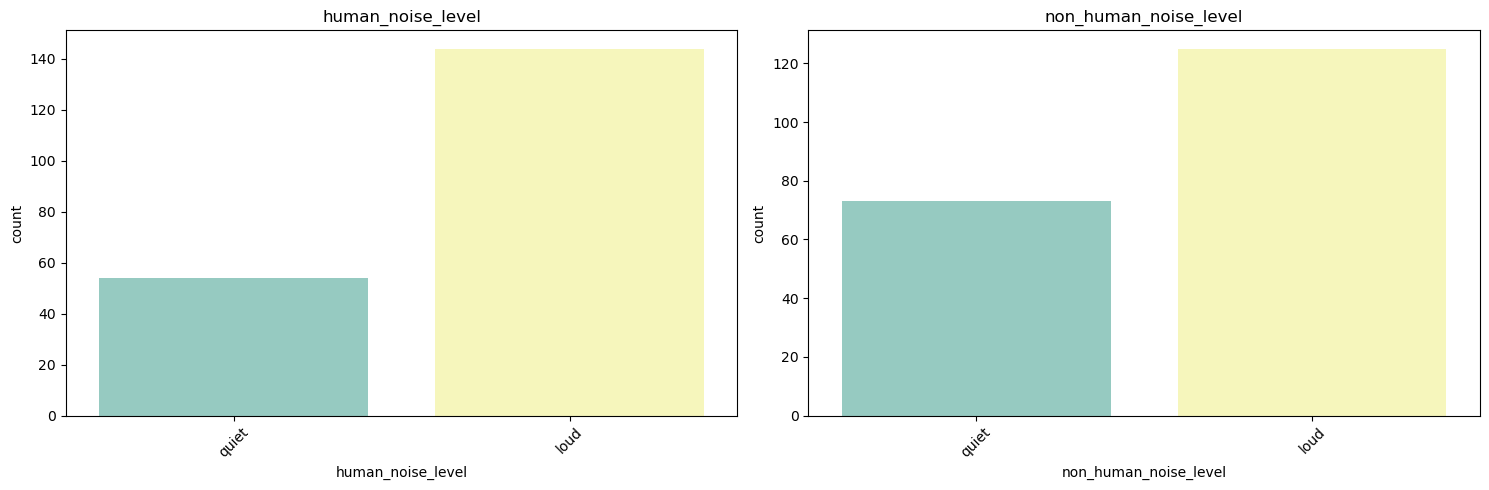

In [6]:
df = pd.read_csv('full_data_2024-04-24 04_57_21.547443.csv')
df = df[['human_noise_level', 'non_human_noise_level']]
visualize_column_distributions(df, {'human_noise_level': ['quiet', 'loud'],
                                    'non_human_noise_level': ['quiet', 'loud']}, 5)


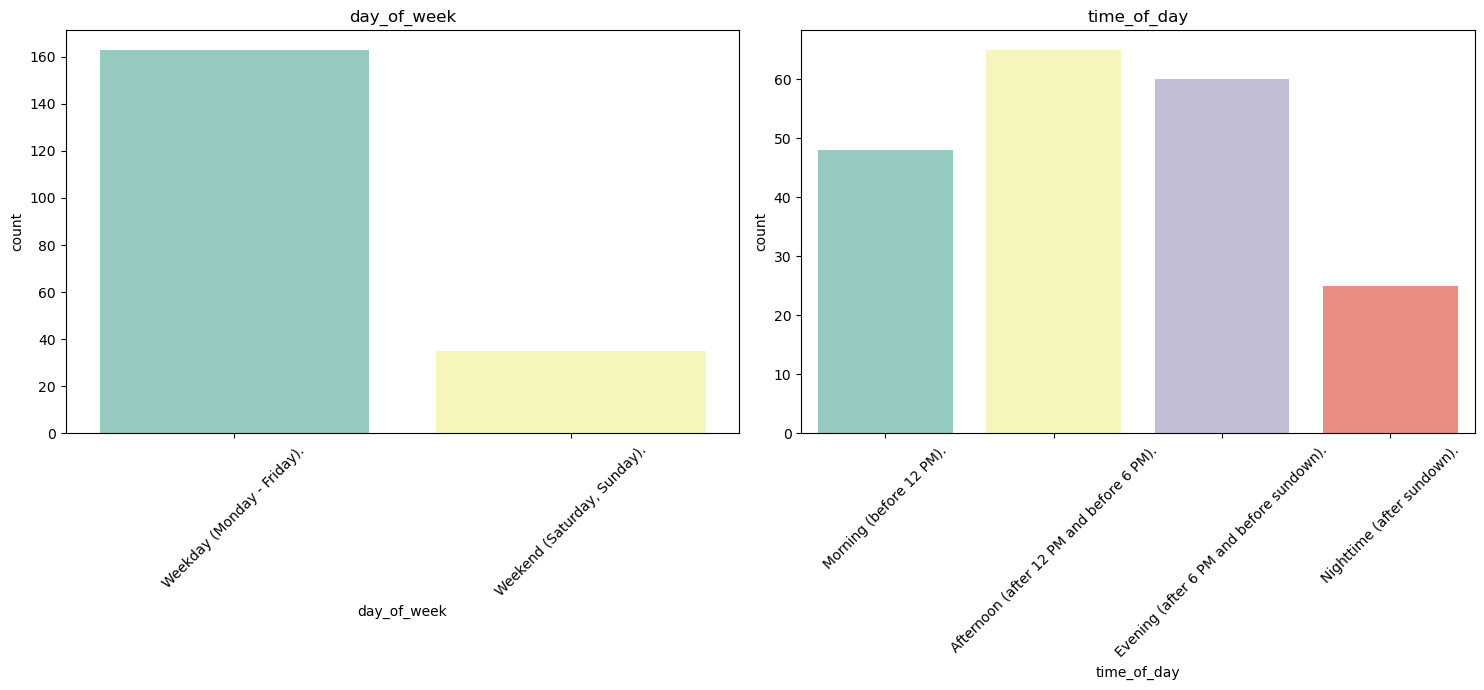

In [7]:
df = pd.read_csv('full_data_2024-04-24 04_57_21.547443.csv')
df = df[['day_of_week', 'time_of_day']]
visualize_column_distributions(df, {'day_of_week': ['Weekday (Monday - Friday).', 'Weekend (Saturday, Sunday).'],
                                    'time_of_day': ['Morning (before 12 PM).', 'Afternoon (after 12 PM and before 6 PM).',
                                                    'Evening (after 6 PM and before sundown).', 'Nighttime (after sundown).']}, 7)


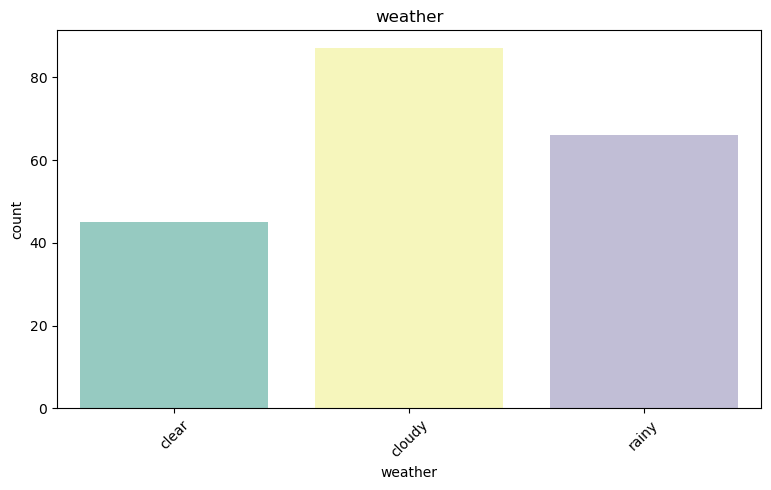

In [8]:
df = pd.read_csv('full_data_2024-04-24 04_57_21.547443.csv')
df = df[['weather']]
visualize_column_distributions(df, {'weather': ['clear', 'cloudy', 'rainy']}, 5, 2)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


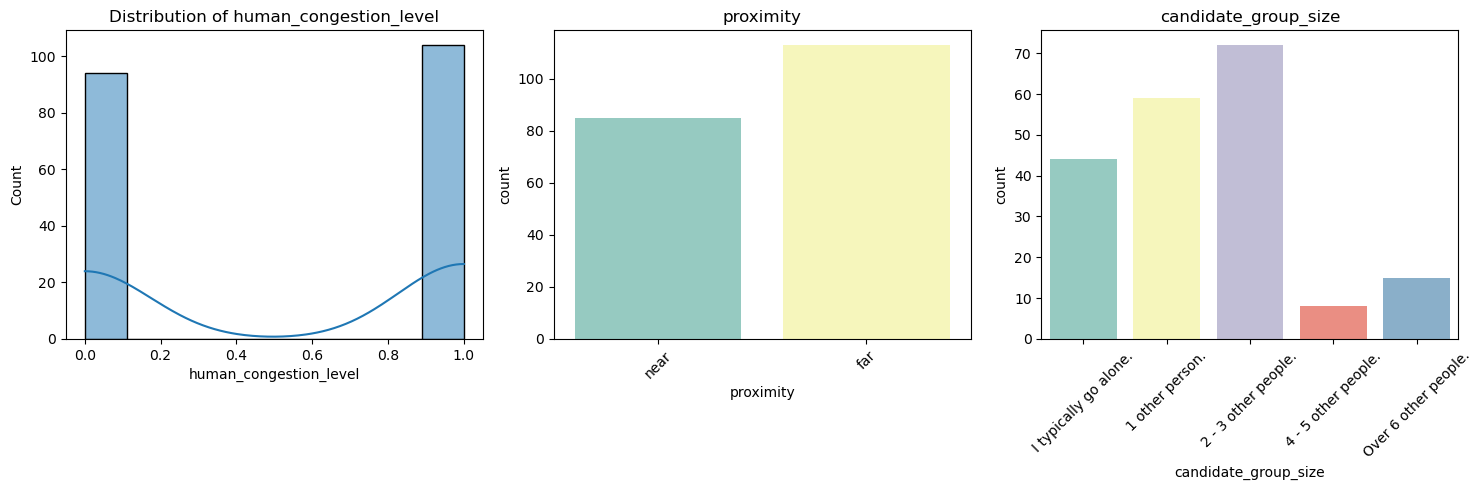

In [9]:
df = pd.read_csv('full_data_2024-04-24 04_57_21.547443.csv')
df = df[['human_congestion_level', 'proximity', 'candidate_group_size']]
df = df.replace(["I'm typically alone."], "I typically go alone.")
visualize_column_distributions(df, {'proximity': ['near', 'far'],
                                    'candidate_group_size': ['I typically go alone.',
                                                             '1 other person.',
                                                             '2 - 3 other people.',
                                                             '4 - 5 other people.',
                                                             'Over 6 other people.']}, 5, 3)


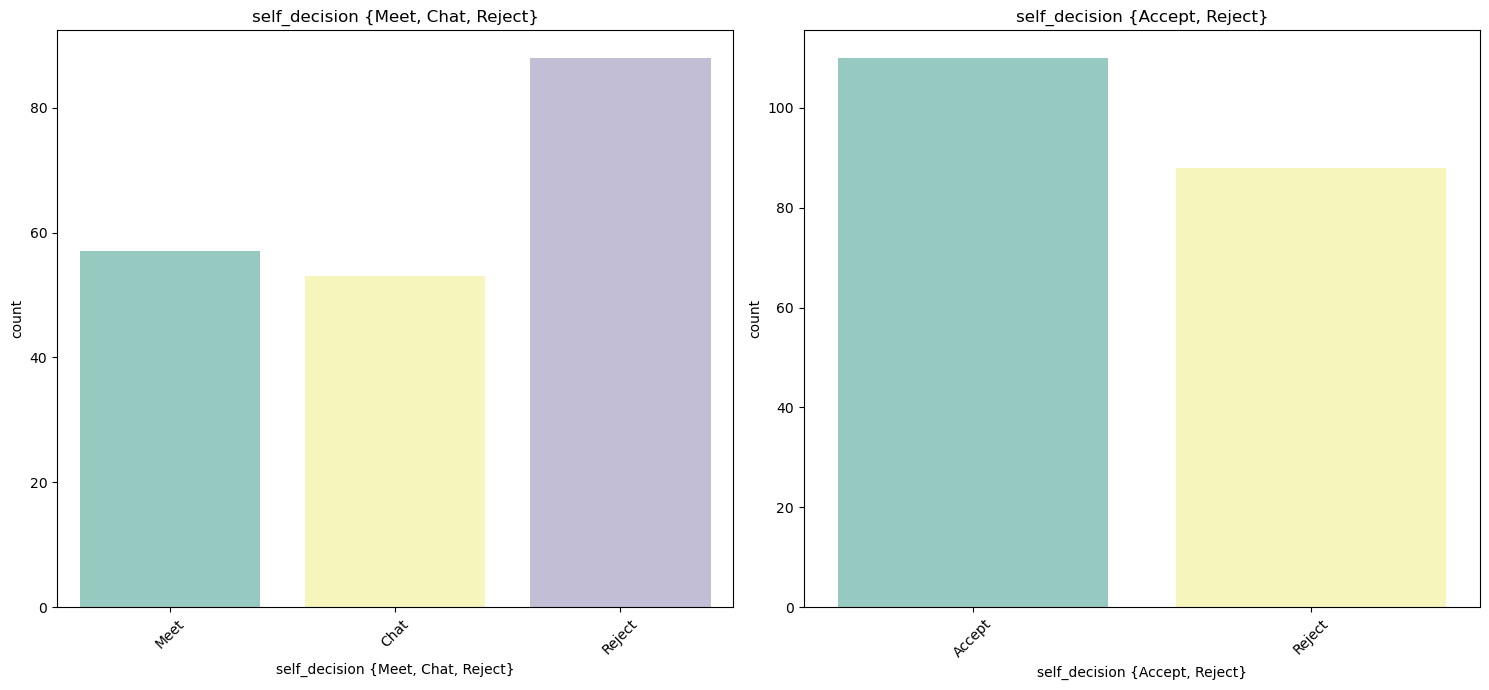

In [10]:
df = pd.read_csv('full_data_2024-04-24 04_57_21.547443.csv')
df = df[['self_decision']]
df_copy = df.copy()
df_copy = df_copy.replace(['Meet (in-person)', 'Chat (via instant messaging)'], 'Accept')
df = df.replace(['Meet (in-person)'], 'Meet')
df = df.replace(['Chat (via instant messaging)'], 'Chat')
combined_df = pd.concat([df.rename(columns={'self_decision': 'self_decision {Meet, Chat, Reject}'}),
                         df_copy.rename(columns={'self_decision': 'self_decision {Accept, Reject}'})], axis=1)
visualize_column_distributions(combined_df, {'self_decision {Meet, Chat, Reject}': ['Meet', 'Chat', 'Reject'],
                                             'self_decision {Accept, Reject}': ['Accept', 'Reject']}, 7)


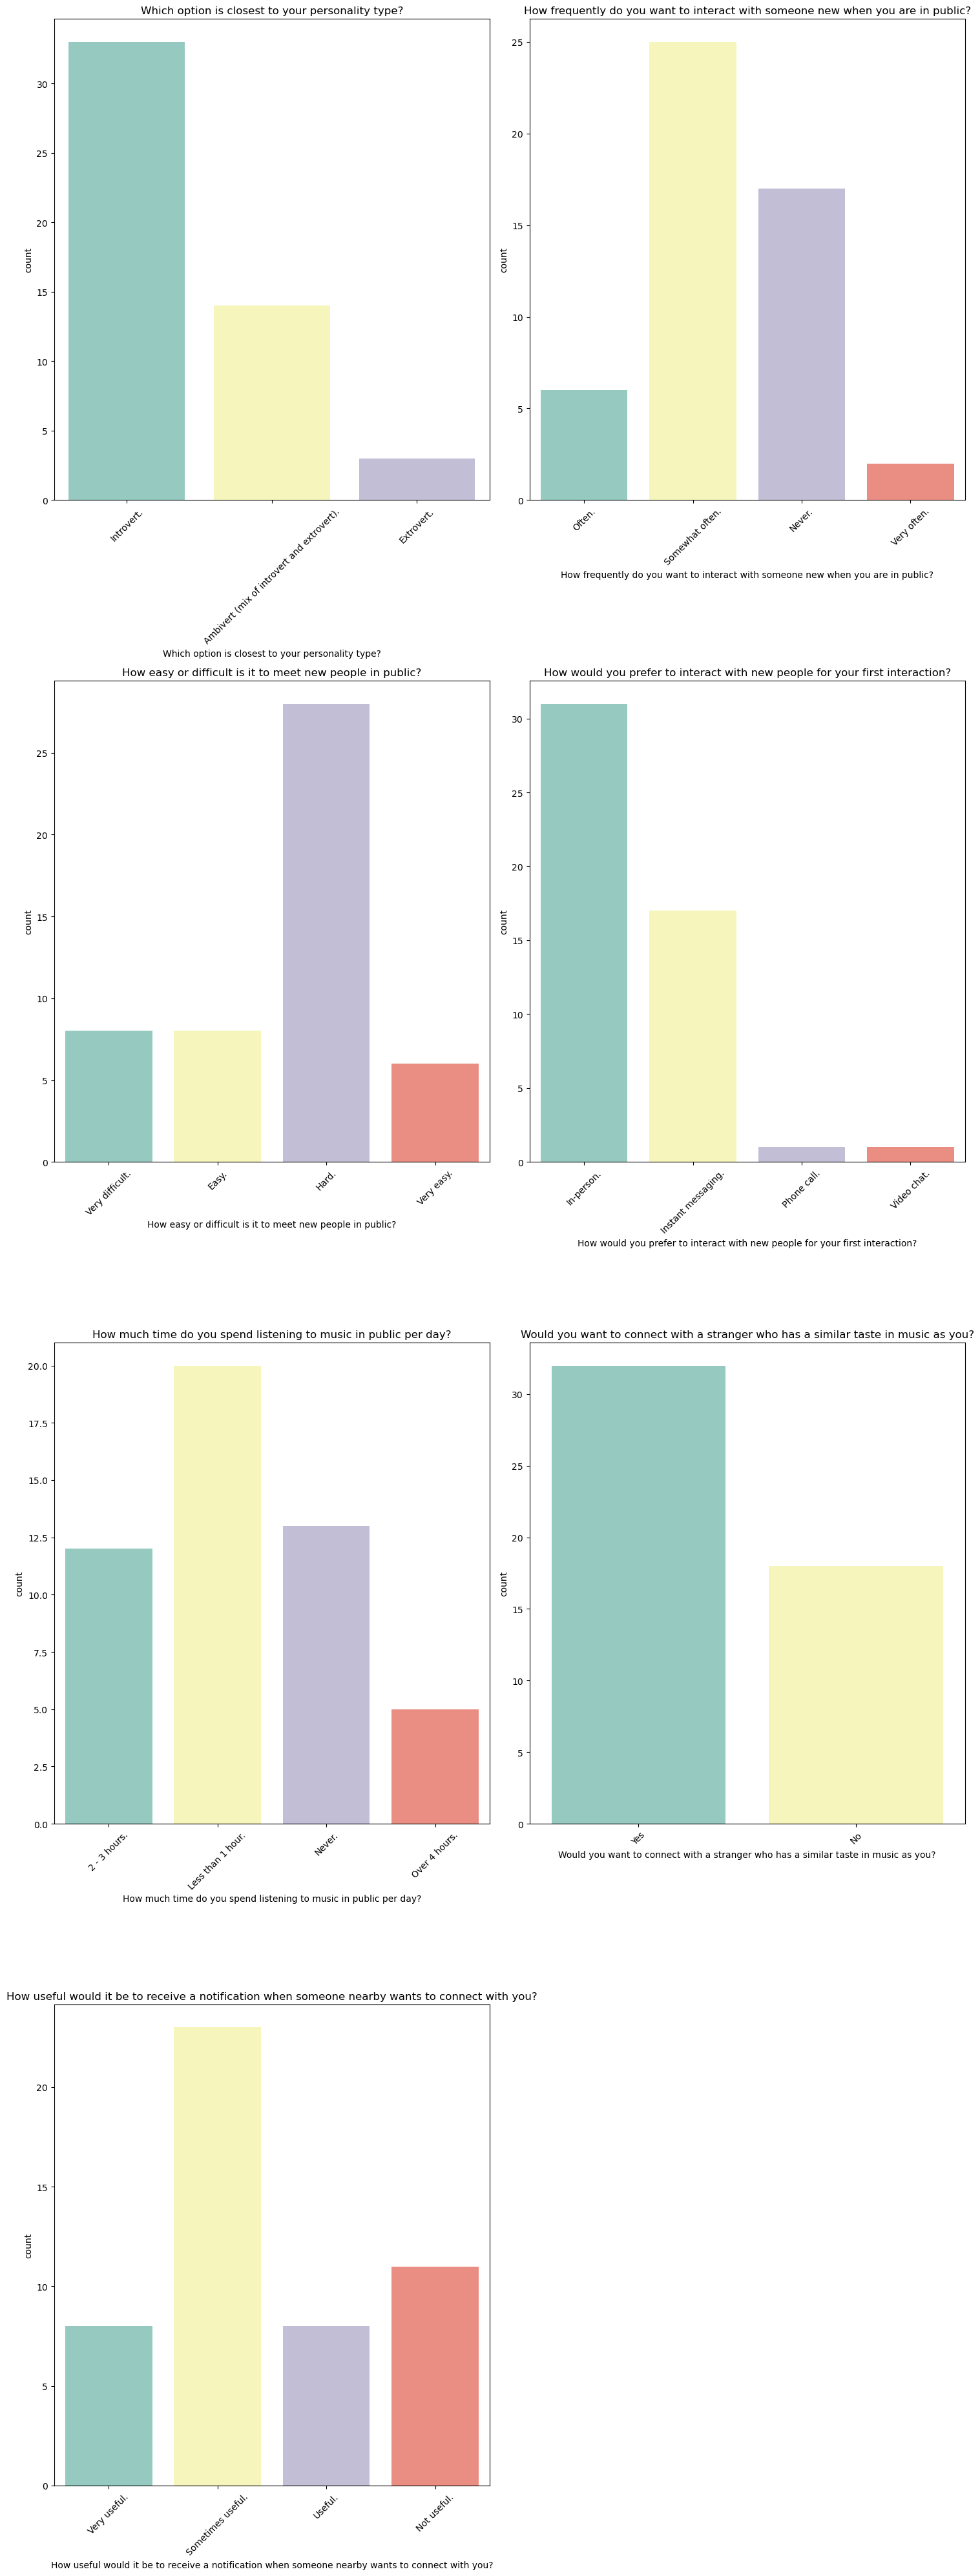

In [11]:
df = pd.read_csv('focus_group.csv')
visualize_column_distributions(df)


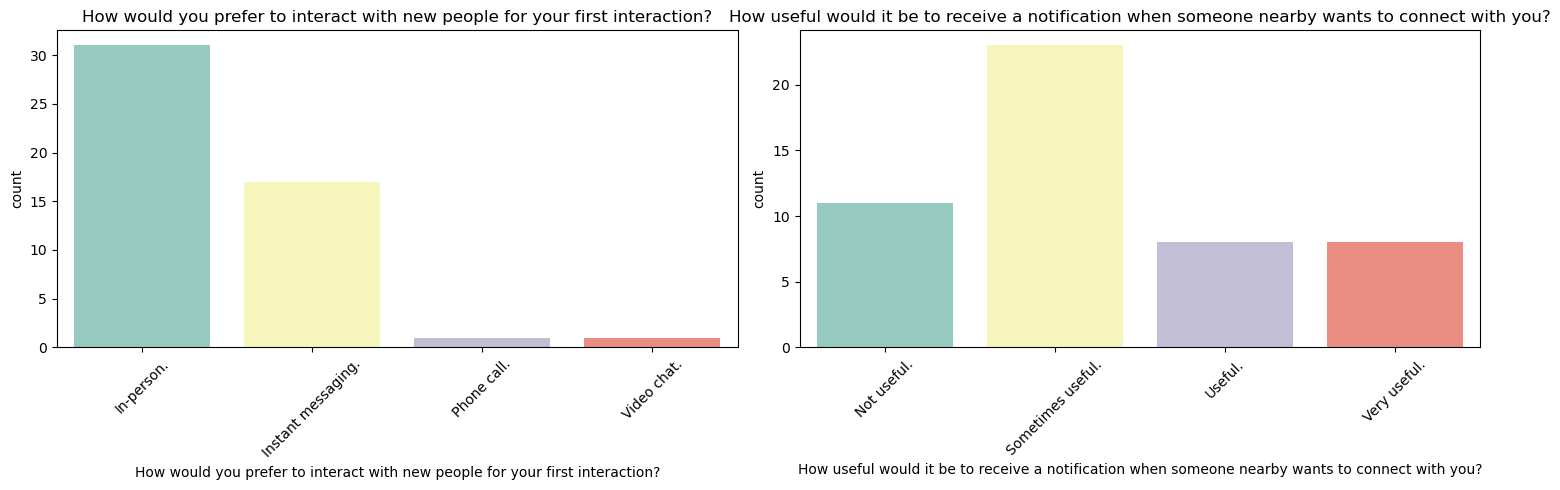

In [12]:
df = pd.read_csv('focus_group.csv')
df = df[['How would you prefer to interact with new people for your first interaction?', 'How useful would it be to receive a notification when someone nearby wants to connect with you?']]
visualize_column_distributions(df,
    {'How would you prefer to interact with new people for your first interaction?': ['In-person.', 'Instant messaging.', 'Phone call.', 'Video chat.'],
     'How useful would it be to receive a notification when someone nearby wants to connect with you?': ['Not useful.', 'Sometimes useful.', 'Useful.', 'Very useful.']},
    5)


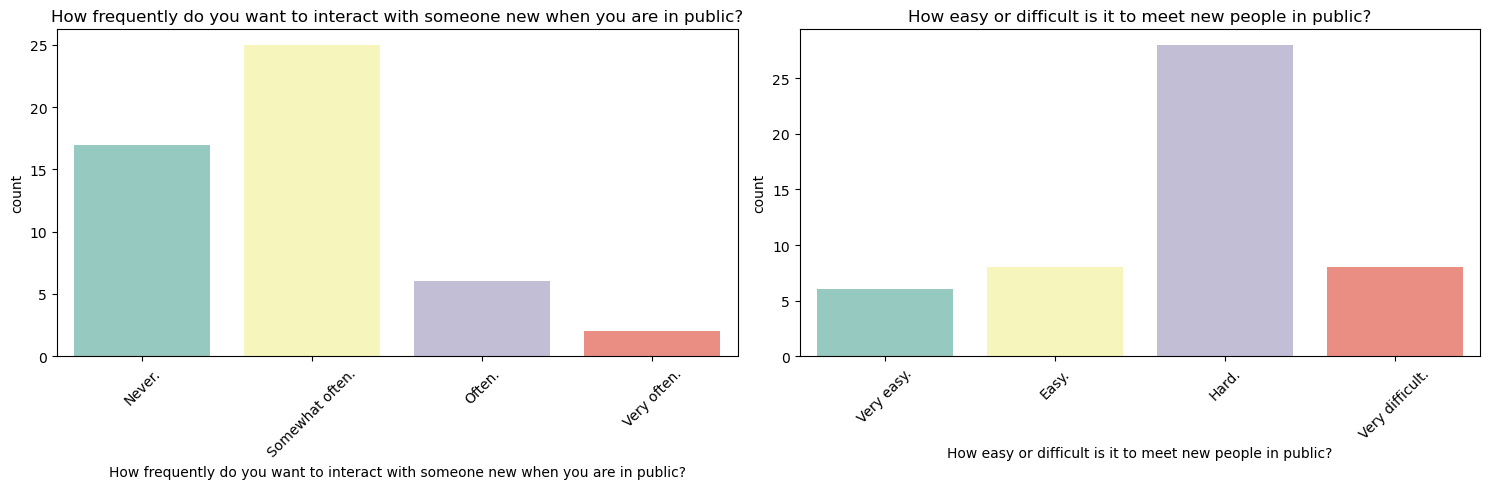

In [13]:
df = pd.read_csv('focus_group.csv')
df = df[['How frequently do you want to interact with someone new when you are in public?', 'How easy or difficult is it to meet new people in public?']]
visualize_column_distributions(df,
    {'How frequently do you want to interact with someone new when you are in public?': ['Never.', 'Somewhat often.', 'Often.', 'Very often.'],
     'How easy or difficult is it to meet new people in public?': ['Very easy.', 'Easy.', 'Hard.', 'Very difficult.']},
    5)


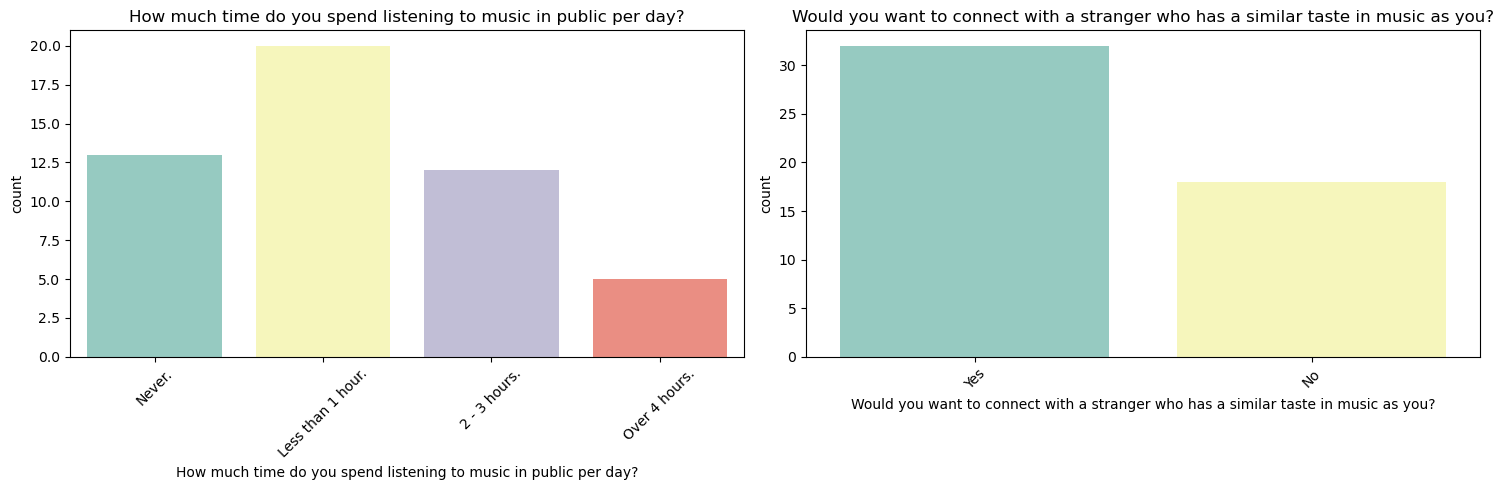

In [14]:
df = pd.read_csv('focus_group.csv')
df = df[['How much time do you spend listening to music in public per day?', 'Would you want to connect with a stranger who has a similar taste in music as you?']]
visualize_column_distributions(df,
    {'How much time do you spend listening to music in public per day?': ['Never.', 'Less than 1 hour.', '2 - 3 hours.', 'Over 4 hours.'],
     'Would you want to connect with a stranger who has a similar taste in music as you?': ['Yes', 'No']},
    5)


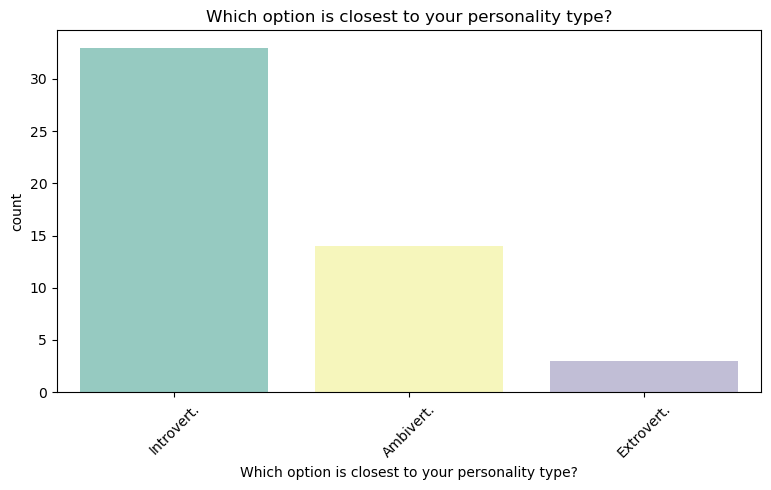

In [15]:
df = pd.read_csv('focus_group.csv')
df = df[['Which option is closest to your personality type?']]
df = df.replace(['Ambivert (mix of introvert and extrovert).'], 'Ambivert.')
visualize_column_distributions(df, None, 5)


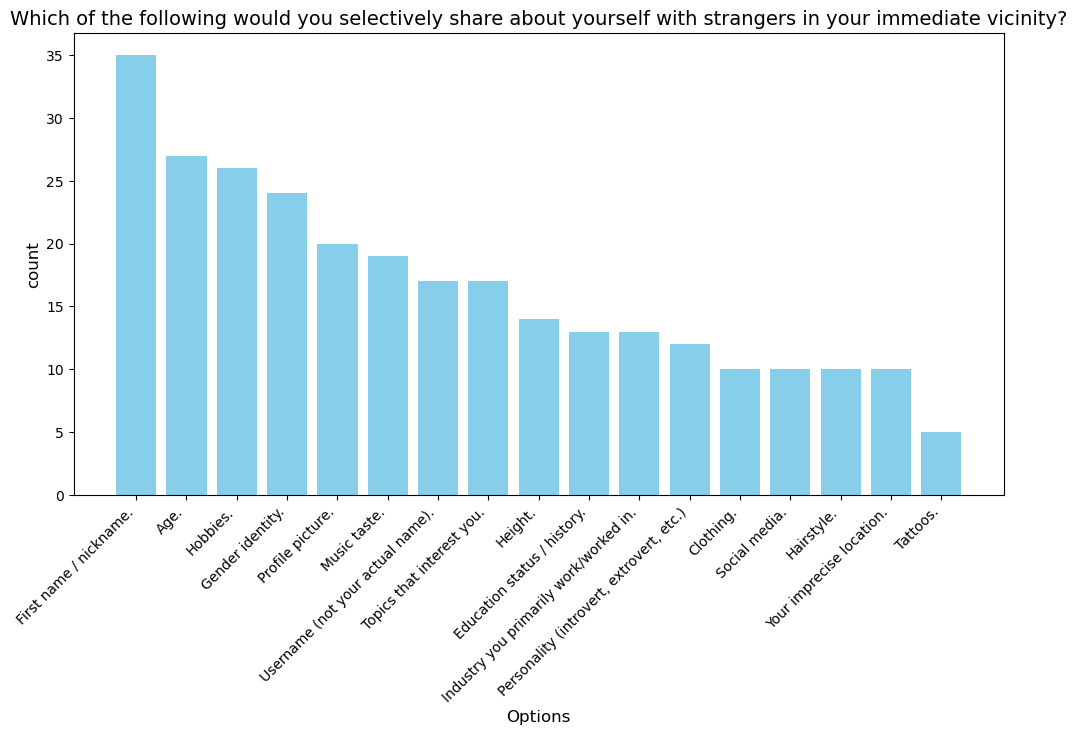

In [16]:
df = pd.read_csv("focus_group_2.csv")
response_column = df.columns[0]
df[response_column] = df[response_column].str.split(';')

exploded_df = df.explode(response_column)

value_counts = exploded_df[response_column].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6)) 

plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel("Options", fontsize=12)
plt.ylabel("count", fontsize=12)
plt.title("Which of the following would you selectively share about yourself with strangers in your immediate vicinity?", fontsize=14)
plt.xticks(value_counts.index, rotation=45, ha="right")
plt.show()
